<a href="https://colab.research.google.com/github/KOWilliams/KOWilliams/blob/main/Painting_Vs_Photograph_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Painting Vs Photograph Classification Dataset
The dataset is located at https://www.kaggle.com/datasets/iiplutocrat45ii/painting-vs-photograph-classification-dataset

In [2]:
!pip install kaggle
# The command pip install kaggle
# is used to install the Kaggle Python package using the pip package manager

In [3]:
from google.colab import files
files.upload()
# This line of code is used to upload files from
# the local machine to the Colab environment.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kehindeoluwaseun","key":"34b8688e556df9e46dd1bf0ae96b6056"}'}

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# The set of code above are used to set up the Kaggle API key on my computer.
# The purpose of these commands is to create a directory named .kaggle
# in the home directory, we move the Kaggle API key file (kaggle.json) into
# that directory, and set the appropriate permissions to ensure that only
# the owner has read and write access to the API key file.
# This is done for security reasons to protect your Kaggle API credentials
# from unauthorized access. The Kaggle API key is used to authenticate and
# interact with the Kaggle platform programmatically.

In [6]:
!kaggle datasets download -d iiplutocrat45ii/painting-vs-photograph-classification-dataset

 98% 423M/430M [00:03<00:00, 156MB/s]
100% 430M/430M [00:03<00:00, 138MB/s]


In [7]:
!unzip painting-vs-photograph-classification-dataset -d painting-vs-photograph-classification-dataset

Streaming output truncated to the last 5000 lines.
  inflating: painting-vs-photograph-classification-dataset/train/photos/94c54a8fcc7cb14074ac10a5ef6e298149b8c007.jpg  
  inflating: painting-vs-photograph-classification-dataset/train/photos/94e1bd10bf9907516c0294e1727e1a5972c84366.jpg  
  inflating: painting-vs-photograph-classification-dataset/train/photos/94f513b161445c2f22f892a7779ae45430ce3d18.jpg  
  inflating: painting-vs-photograph-classification-dataset/train/photos/94f792a9ad417f11e3aa0b81c2cd169164d56968.jpg  
  inflating: painting-vs-photograph-classification-dataset/train/photos/94fdaa407e1c70ba174386c78a09c144f7ae9047.jpg  
  inflating: painting-vs-photograph-classification-dataset/train/photos/950ec8ecccc507bd9f1b43a1404463869edb77f4.jpg  
  inflating: painting-vs-photograph-classification-dataset/train/photos/9524e0e16c6beb7f5b269ac7d71119e9c8c33911.jpg  
  inflating: painting-vs-photograph-classification-dataset/train/photos/9528139eeacb163e1fd3c137c3a256c22ac35922.jpg

In [8]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
import os
# the code imports essential libraries for data analysis (pandas, numpy),
# file and directory manipulation (glob, os), and image processing (cv2).
# These libraries are commonly used in tasks related to data science,
# machine learning, and computer vision.
# Definition of the paths to the Gender Classification Dataset image folders (Lilly, Lotus, Orchid, Sunflower and Tulip)
painting_folder = '/content/painting-vs-photograph-classification-dataset/valid/painting'
photos_folder = '/content/painting-vs-photograph-classification-dataset/valid/photos'
# We are initializing the lists to store images and labels
images = []
labels = []
# We Load and pre-process Painting Vs Photograph Classification Dataset images (Paintings)
for filename in os.listdir(painting_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(painting_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(0)  # 0 represents Painting
# We Load and pre-process Painting Vs Photograph Classification Dataset images (Photos)
for filename in os.listdir(photos_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(photos_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(1)  # 1 represents Photos
# We Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [9]:
from sklearn.model_selection import train_test_split

# We are Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [10]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Assuming we have already loaded and pre-processed data
# (x_train, y_train, x_test, y_test)

# Definition of the model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')])  # 2 classes: Painting and Photos

# Compilation of the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training of the model
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/30
76/76 [==============================] - 34s 439ms/step - loss: 41.4761 - accuracy: 0.5378 - val_loss: 0.6761 - val_accuracy: 0.5797
Epoch 2/30
76/76 [==============================] - 33s 432ms/step - loss: 0.6280 - accuracy: 0.6483 - val_loss: 0.7276 - val_accuracy: 0.6478
Epoch 3/30
76/76 [==============================] - 34s 444ms/step - loss: 0.5462 - accuracy: 0.7089 - val_loss: 0.6563 - val_accuracy: 0.6561
Epoch 4/30
76/76 [==============================] - 33s 433ms/step - loss: 0.4284 - accuracy: 0.8189 - val_loss: 0.7931 - val_accuracy: 0.6661
Epoch 5/30
76/76 [==============================] - 33s 433ms/step - loss: 0.3402 - accuracy: 0.8700 - val_loss: 0.7938 - val_accuracy: 0.6678
Epoch 6/30
76/76 [==============================] - 33s 441ms/step - loss: 0.1727 - accuracy: 0.9406 - val_loss: 0.9579 - val_accuracy: 0.6478
Epoch 7/30
76/76 [==============================] - 33s 434ms/step - loss: 0.0986 - accuracy: 0.9730 - val_loss: 1.1158 - val_accuracy: 0.666

In [11]:
# This section of code is to perform a cross validation on the model

import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold

# Assuming you have loaded and pre-processed data (x_train, y_train)

# Number of folds for cross-validation
num_folds = 2

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store the training and validation accuracies
train_accuracies = []
val_accuracies = []

# Iterate over the folds
for fold, (train_index, val_index) in enumerate(stratified_kfold.split(x_train, y_train)):
    # Split the data into training and validation sets for this fold
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Definition of the model
    model = tf.keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(2, activation='softmax')  # 2 classes Painting and Photos
    ])

    # Compilation of the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Training of the model
    history = model.fit(x_train_fold, y_train_fold, epochs=30, batch_size=32, validation_data=(x_val_fold, y_val_fold))

    # Evaluate and store training and validation accuracy for this fold
    _, train_accuracy = model.evaluate(x_train_fold, y_train_fold)
    _, val_accuracy = model.evaluate(x_val_fold, y_val_fold)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Print the average training and validation accuracies across folds
print(f"\nAverage Training Accuracy: {sum(train_accuracies) / num_folds:.4f}")
print(f"Average Validation Accuracy: {sum(val_accuracies) / num_folds:.4f}")

Epoch 1/30
38/38 [==============================] - 21s 550ms/step - loss: 77.0514 - accuracy: 0.5299 - val_loss: 0.7466 - val_accuracy: 0.5581
Epoch 2/30
38/38 [==============================] - 20s 528ms/step - loss: 0.6222 - accuracy: 0.6769 - val_loss: 0.7130 - val_accuracy: 0.5930
Epoch 3/30
38/38 [==============================] - 21s 544ms/step - loss: 0.4044 - accuracy: 0.8389 - val_loss: 0.8347 - val_accuracy: 0.6038
Epoch 4/30
38/38 [==============================] - 21s 546ms/step - loss: 0.2706 - accuracy: 0.9045 - val_loss: 0.9718 - val_accuracy: 0.6146
Epoch 5/30
38/38 [==============================] - 21s 552ms/step - loss: 0.1617 - accuracy: 0.9468 - val_loss: 1.1541 - val_accuracy: 0.6420
Epoch 6/30
38/38 [==============================] - 21s 547ms/step - loss: 0.1132 - accuracy: 0.9684 - val_loss: 1.4895 - val_accuracy: 0.6395
Epoch 7/30
38/38 [==============================] - 21s 548ms/step - loss: 0.0694 - accuracy: 0.9850 - val_loss: 1.5488 - val_accuracy: 0.619

In [12]:
# Predicting on a single image
sample_image = x_test[3]  # Here we replace with our image data
predictions = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(predictions)
# Here we interpret the label using our dataset's class labels (0 Painting and 1 Photos)
class_labels = 'painting'
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 81ms/step
Predicted class: p


In [13]:
# Predicting on a single image
sample_image = x_test[3]  # Here we replace with our image data
predictions = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(predictions)

1/1 [==============================] - 0s 19ms/step


In [14]:
# we test the model with a new photo from the internet.
# we know already that this new image is a Painting image.
from PIL import Image
import numpy as np

# Load the new image
new_image_path = '/content/painting-vs-photograph-classification-dataset/valid/painting/0000d888303fc3169c4a0b80d5880142382afa90.jpg'
# Replace with the actual path to your new image
new_image = Image.open(new_image_path)

# Resize the image to match the input size expected by your model
input_size = (128, 128)  # Adjust this size based on your model's input size
new_image = new_image.resize(input_size)

# Convert the PIL image to a NumPy array
new_image_array = np.array(new_image)

# Normalize the image pixel values (if needed)
new_image_array = new_image_array / 255.0

# Making predictions on the new image
predictions = model.predict(np.expand_dims(new_image_array, axis=0))
predicted_label = np.argmax(predictions)

# Interpret the label using your dataset's class labels
class_labels = ['painting', 'Photos']
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')

# Close the image
new_image.close()

1/1 [==============================] - 0s 61ms/step
Predicted class: painting


In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 57600)             0         
                                                                 
 dense_6 (Dense)             (None, 64)               

19/19 [==============================] - 2s 123ms/step


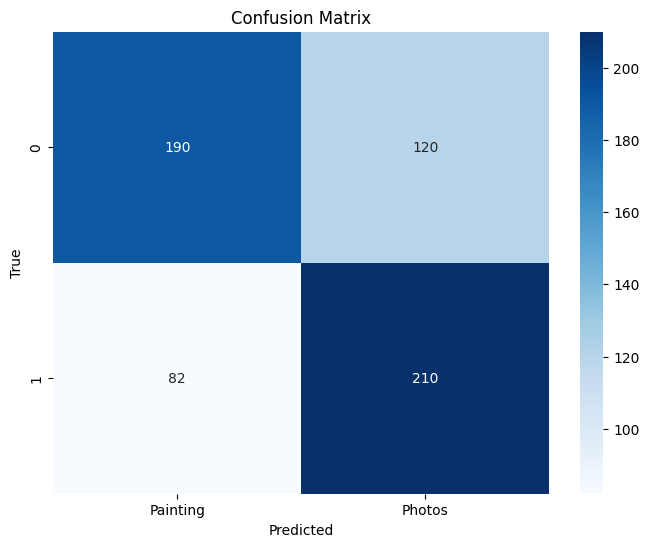

              precision    recall  f1-score   support

    Painting       0.70      0.61      0.65       310
      Photos       0.64      0.72      0.68       292

    accuracy                           0.66       602
   macro avg       0.67      0.67      0.66       602
weighted avg       0.67      0.66      0.66       602



In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'predicted_labels' are the model's predicted labels for the test set
# 'y_test' contains the true labels of the test set

# Convert one-hot encoded predictions to class labels
predicted_labels = model.predict(x_test)
predicted_labels = tf.argmax(predicted_labels, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Painting', 'Photos'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
class_report = classification_report(y_test, predicted_labels, target_names=['Painting', 'Photos'])
print(class_report)